In [8]:
import os

arm_dir = os.path.join('/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Train/armature')
ram_dir = os.path.join('/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Train/memory-chip')
tra_dir = os.path.join('/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Train/PNP-transistor')

print('total training Armature images:', len(os.listdir(arm_dir)))
print('total training RAM images:', len(os.listdir(ram_dir)))
print('total training Transistor images:', len(os.listdir(tra_dir)))

arm_files = os.listdir(arm_dir)
print(arm_files[:10])

ram_files = os.listdir(ram_dir)
print(ram_files[:10])
tra_files = os.listdir(tra_dir)
print(tra_files[:10])

total training Armature images: 257
total training RAM images: 237
total training Transistor images: 246
['armature-coil030.jpg', 'armature-coil029.jpg', 'armature-coil026.jpg', 'armature-coil025.jpg', 'armature-coil027.jpg', 'armature-coil023.jpg', 'armature-coil022.jpg', 'armature-coil028.jpg', 'armature-coil024.jpg', 'armature-coil021.jpg']
['memory-chip021.jpg', 'memory-chip019.jpg', 'memory-chip015.jpg', 'memory-chip020.jpg', 'memory-chip018.jpg', 'memory-chip016.jpg', 'memory-chip017.jpg', 'memory-chip024.jpg', 'memory-chip023.jpg', 'memory-chip022.jpg']
['PNP-transistor019.jpg', 'PNP-transistor018.jpg', 'PNP-transistor010.jpg', 'PNP-transistor009.jpg', 'PNP-transistor008.jpg', 'PNP-transistor005.jpg', 'PNP-transistor001.jpg', 'PNP-transistor004.jpg', 'PNP-transistor003.jpg', 'PNP-transistor002.jpg']


/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Train/armature/armature-coil030.jpg


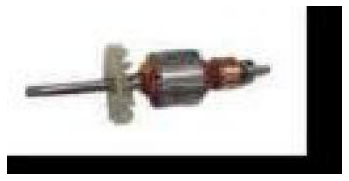

/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Train/armature/armature-coil029.jpg


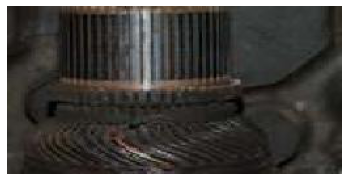

/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Train/memory-chip/memory-chip021.jpg


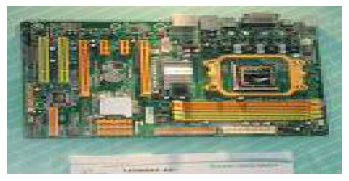

/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Train/memory-chip/memory-chip019.jpg


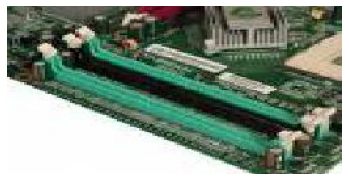

/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Train/PNP-transistor/PNP-transistor019.jpg


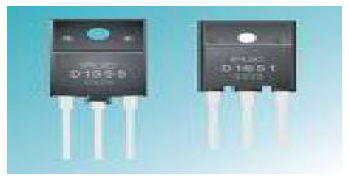

/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Train/PNP-transistor/PNP-transistor018.jpg


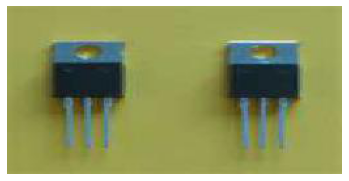

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_arm = [os.path.join(arm_dir, fname) 
                for fname in arm_files[pic_index-2:pic_index]]
next_ram = [os.path.join(ram_dir, fname) 
                for fname in ram_files[pic_index-2:pic_index]]
next_tra = [os.path.join(tra_dir, fname) 
                for fname in tra_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_arm +next_ram+next_tra):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [10]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/S6 Project/Datasets/EC_dataset1/Trial_Dataset/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(128,64),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(128,64),
	class_mode='categorical'
)

Found 740 images belonging to 3 classes.
Found 185 images belonging to 3 classes.


In [11]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(128, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit_generator(train_generator, epochs=40, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")


Found 740 images belonging to 3 classes.
Found 185 images belonging to 3 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 126, 62, 64)       1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 63, 31, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 6, 128)        0         
______________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
24/24 [==============================] - 21s 836ms/step - loss: 1.1354 - accuracy: 0.3649 - val_loss: 1.0748 - val_accuracy: 0.3676
Epoch 2/40
24/24 [==============================] - 20s 827ms/step - loss: 1.1511 - accuracy: 0.3743 - val_loss: 1.0469 - val_accuracy: 0.4324
Epoch 3/40
24/24 [==============================] - 20s 818ms/step - loss: 1.0778 - accuracy: 0.5027 - val_loss: 0.9582 - val_accuracy: 0.5676
Epoch 4/40
24/24 [==============================] - 20s 816ms/step - loss: 1.0135 - accuracy: 0.5203 - val_loss: 0.9163 - val_accuracy: 0.6486
Epoch 5/40
24/24 [==============================] - 20s 811ms/step - loss: 0.9950 - accuracy: 0.5622 - val_loss: 0.8228 - val_accuracy: 0.6649
Epoch 6/40
24/24 [==============================] - 20s 809ms/step - loss: 0.9046 - accuracy: 0.6000 - val_loss: 0.7849 - val_accuracy: 0.7297
Epoch 7/40
24/24 [==============================] - 20s 815ms/step - loss: 0.9491 - accuracy: 0.5662 - val_loss: 0.9074 - val_accuracy: 0.5676

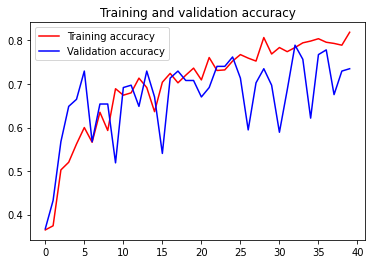

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(128, 64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving armature-coil319.jpg to armature-coil319 (1).jpg
armature-coil319.jpg
[[0. 1. 0.]]
